<a href="https://colab.research.google.com/github/yuribp0107/Curso-CNN-RX/blob/main/Taller_Convolusion_y_pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Librerias**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from scipy.signal import convolve2d
import matplotlib.patches as patches

##**Filtro convolucional**

###**Imagen de entrada**

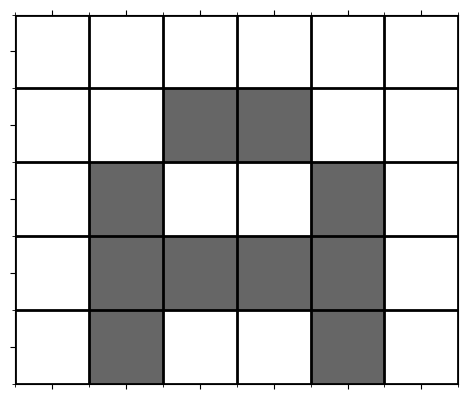

In [ ]:
def show_matrix_with_grid(matrix):
    fig, ax = plt.subplots()
    ax.matshow(matrix, cmap='gray_r', vmin=0, vmax=1)

    # Establecer las posiciones de las marcas (ticks)
    ax.set_xticks(np.arange(-0.5, len(matrix[0]), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(matrix), 1), minor=True)

    # Eliminar las etiquetas de los ejes
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Añadir la cuadrícula
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    ax.axis('on')


# Crea una matriz con la forma de la letra 'A'
matrix = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0.6, 0.6, 0, 0],
    [0, 0.6, 0, 0, 0.6, 0],
    [0, 0.6, 0.6, 0.6, 0.6, 0],
    [0, 0.6, 0, 0, 0.6, 0]
])

# Muestra la matriz con la cuadrícula
show_matrix_with_grid(matrix)
plt.show()


###**Imagen de entrada con los valores del pixel**

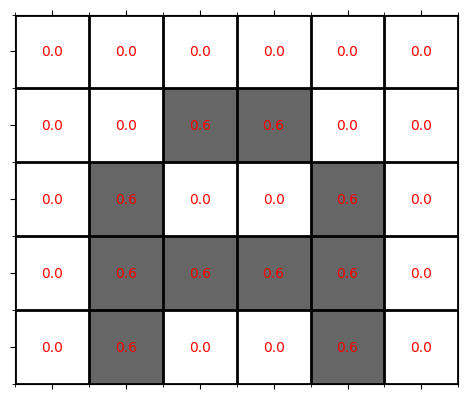

In [ ]:
def show_matrix_with_grid(matrix):
    fig, ax = plt.subplots()
    ax.matshow(matrix, cmap='gray_r', vmin=0, vmax=1)

    # Establecer las posiciones de las marcas (ticks)
    ax.set_xticks(np.arange(-0.5, len(matrix[0]), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(matrix), 1), minor=True)

    # Eliminar las etiquetas de los ejes
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Añadir la cuadrícula
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    ax.axis('on')
    for (i, j), val in np.ndenumerate(matrix):
        ax.text(j, i, f'{val:.1f}', ha='center', va='center', color='red')

# Crea una matriz con la forma de la letra 'A'
matrix = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0.6, 0.6, 0, 0],
    [0, 0.6, 0, 0, 0.6, 0],
    [0, 0.6, 0.6, 0.6, 0.6, 0],
    [0, 0.6, 0, 0, 0.6, 0]
])

# Muestra la matriz con la cuadrícula
show_matrix_with_grid(matrix)
plt.show()


###**Ejemplo de kERNEL**

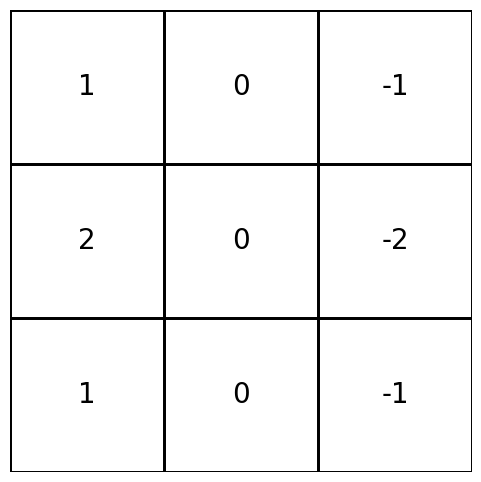

In [ ]:
# Define el kernel
kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

# Configura el tamaño de la figura con fondo transparente
fig, ax = plt.subplots(facecolor='none')
fig.set_size_inches(6, 6)

# Dibuja un cuadrado grande
ax.add_patch(patches.Rectangle((0, 0), 3, 3, fill=False, edgecolor='black', lw=2))

# Divide el cuadrado en 9 partes iguales y coloca los números
for i in range(3):
    for j in range(3):
        # Dibuja las líneas de división
        ax.add_patch(patches.Rectangle((j, 2 - i), 1, 1, fill=False, edgecolor='black', lw=2))

        # Coloca los números
        text = kernel[i, j]
        ax.text(j + 0.5, 2 - i + 0.5, str(text), ha='center', va='center', fontsize=20)

# Configura los límites y aspecto de la gráfica
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
ax.set_aspect('equal')
ax.axis('off')  # Desactiva los ejes

plt.show()

# Guarda la figura con fondo transparente
# fig.savefig('kernel_grid.png', transparent=True)


###**Imagen de entrada y la imagen convolucion**

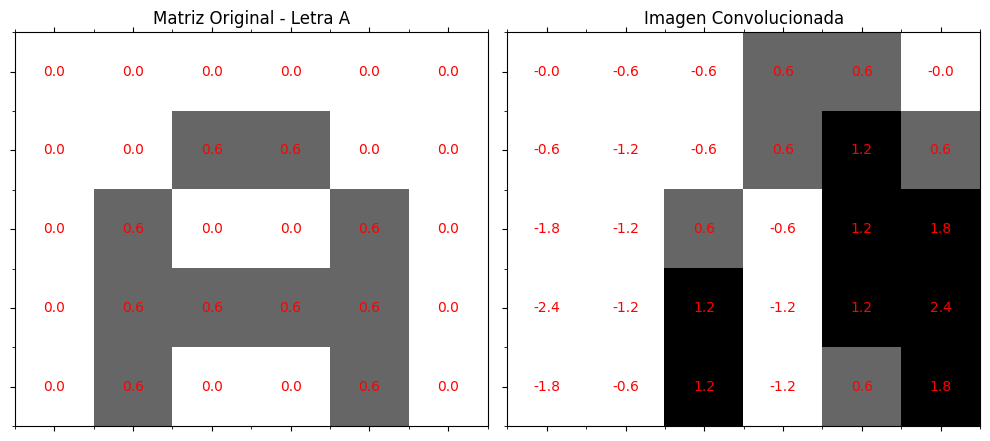

In [ ]:
def show_matrix_with_numbers(matrix, title, subplot_pos, vmin, vmax):
    ax = plt.subplot(1, 2, subplot_pos)  # Ajustado para una cuadrícula 1x2
    ax.matshow(matrix, cmap='gray_r', vmin=0, vmax=1)
    # Establecer las posiciones de las marcas (ticks)
    ax.set_xticks(np.arange(-0.5, len(matrix[0]), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(matrix), 1), minor=True)

    # Eliminar las etiquetas de los ejes
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title(title)
    for (i, j), val in np.ndenumerate(matrix):
        ax.text(j, i, f'{val:.1f}', ha='center', va='center', color='red')


# Crea una matriz con la forma de la letra 'A'
matrix = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0.6, 0.6, 0, 0],
    [0, 0.6, 0, 0, 0.6, 0],
    [0, 0.6, 0.6, 0.6, 0.6, 0],
    [0, 0.6, 0, 0, 0.6, 0]
])


# Define solo el filtro de promediado
kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

# Muestra los resultados usando subplots
plt.figure(figsize=(10, 5))
show_matrix_with_numbers(matrix, 'Matriz Original - Letra A', 1, 0, 1)

# Aplica el filtro de promediado y muestra el resultado
convolved_matrix = convolve2d(matrix, kernel, mode='same')
convolved_matrix = convolved_matrix * -1
show_matrix_with_numbers(convolved_matrix, 'Imagen Convolucionada', 2, 0, 1)

plt.tight_layout()
plt.show()


###**Imagen de entrada, la imagen convolucion, e imagen convolucion ´ReLU"**

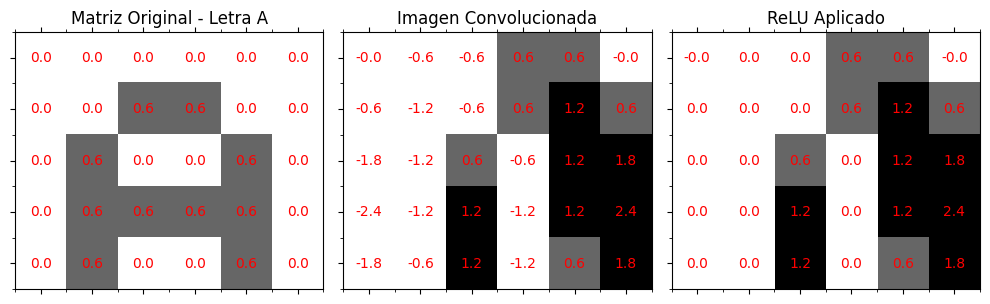

In [ ]:
def show_matrix_with_numbers(matrix, title, subplot_pos, vmin, vmax):
    ax = plt.subplot(1, 3, subplot_pos)  # Ajustado para una cuadrícula 1x2
    ax.matshow(matrix, cmap='gray_r', vmin=0, vmax=1)
    # Establecer las posiciones de las marcas (ticks)
    ax.set_xticks(np.arange(-0.5, len(matrix[0]), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(matrix), 1), minor=True)

    # Eliminar las etiquetas de los ejes
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title(title)
    for (i, j), val in np.ndenumerate(matrix):
        ax.text(j, i, f'{val:.1f}', ha='center', va='center', color='red')

def relu(matrix):
    return np.maximum(0, matrix)

# Crea una matriz con la forma de la letra 'A'
matrix = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0.6, 0.6, 0, 0],
    [0, 0.6, 0, 0, 0.6, 0],
    [0, 0.6, 0.6, 0.6, 0.6, 0],
    [0, 0.6, 0, 0, 0.6, 0]
])


# Define solo el filtro de promediado
kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

# Muestra los resultados usando subplots
plt.figure(figsize=(10, 5))
show_matrix_with_numbers(matrix, 'Matriz Original - Letra A', 1, 0, 1)

# Aplica el filtro de promediado y muestra el resultado
convolved_matrix = convolve2d(matrix, kernel, mode='same')
convolved_matrix = convolved_matrix * -1
show_matrix_with_numbers(convolved_matrix, 'Imagen Convolucionada', 2, 0, 1)

# Aplica ReLU a la matriz convolucionada y muestra el resultado
relu_matrix = relu(convolved_matrix)
show_matrix_with_numbers(relu_matrix, 'ReLU Aplicado', 3, 0, 1)



plt.tight_layout()
plt.show()


###**Otros Kernel**

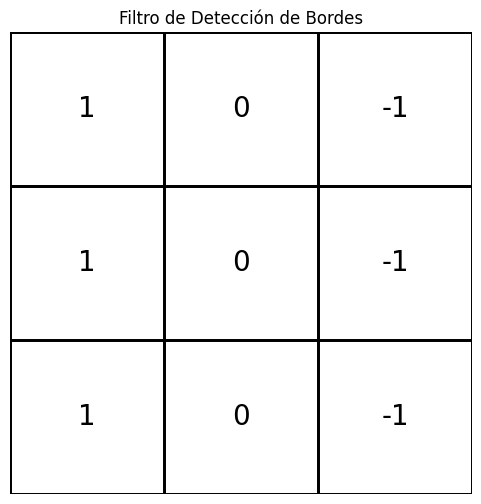

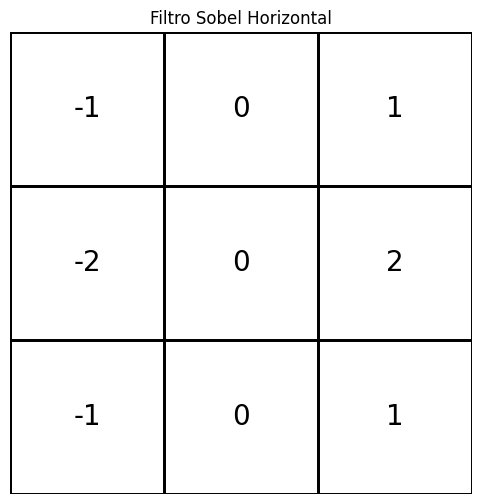

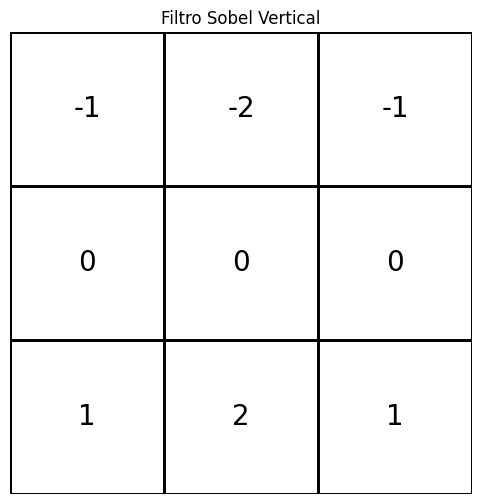

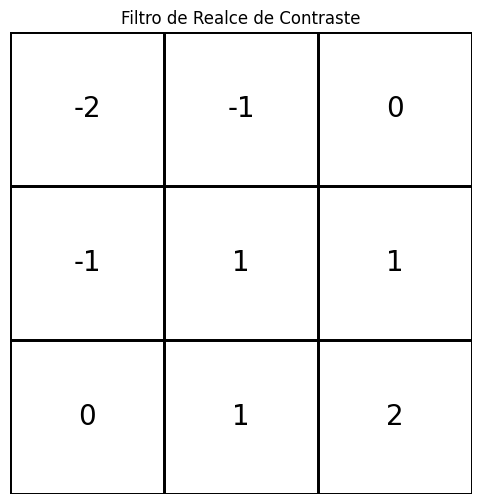

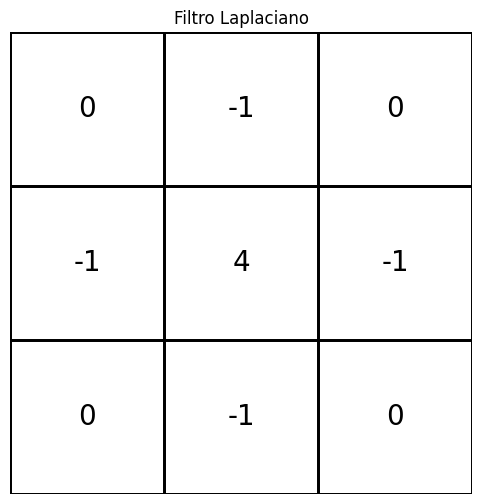

In [ ]:
def plot_kernel(kernel, title):
    fig, ax = plt.subplots(facecolor='none')
    fig.set_size_inches(6, 6)

    # Dibuja un cuadrado grande
    ax.add_patch(patches.Rectangle((0, 0), 3, 3, fill=False, edgecolor='black', lw=2))

    # Divide el cuadrado en 9 partes iguales y coloca los números
    for i in range(3):
        for j in range(3):
            # Dibuja las líneas de división
            ax.add_patch(patches.Rectangle((j, 2 - i), 1, 1, fill=False, edgecolor='black', lw=2))

            # Coloca los números
            text = kernel[i, j]
            ax.text(j + 0.5, 2 - i + 0.5, str(text), ha='center', va='center', fontsize=20)

    # Configura los límites y aspecto de la gráfica
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title(title)
    plt.show()

# Define varios kernels diferentes y sus nombres
kernels = [
    (np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]), "Filtro de Detección de Bordes"),
    (np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]), "Filtro Sobel Horizontal"),
    (np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]), "Filtro Sobel Vertical"),
    (np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]), "Filtro de Realce de Contraste"),
    (np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]), "Filtro Laplaciano")
]

# Imprime los kernels
for kernel, title in kernels:
    plot_kernel(kernel, title)


###**Imagen de entrada, la imagen convolucion en diferentes kernel**

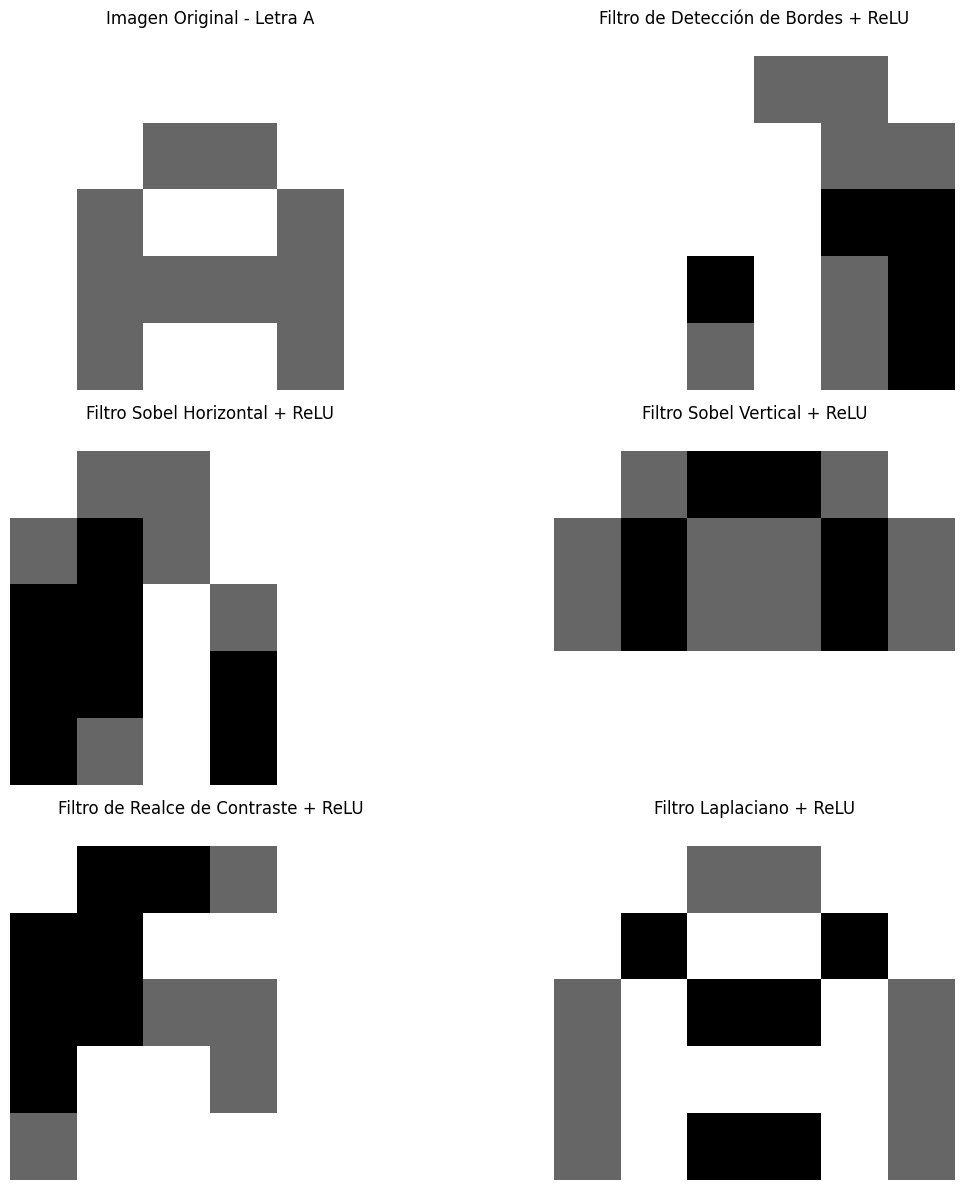

In [ ]:
def show_matrix(matrix, title, subplot_pos):
    ax = plt.subplot(3, 2, subplot_pos)
    ax.matshow(matrix, cmap='gray_r', vmin=0, vmax=1)
    plt.title(title)
    plt.axis('off')

def relu(matrix):
    return np.maximum(0, matrix)

# Crea una matriz con la forma de la letra 'A'
matrix = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0.6, 0.6, 0, 0],
    [0, 0.6, 0, 0, 0.6, 0],
    [0, 0.6, 0.6, 0.6, 0.6, 0],
    [0, 0.6, 0, 0, 0.6, 0]
])

# Define varios kernels diferentes y sus nombres
kernels = [
    (np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]), "Filtro de Detección de Bordes"),
    (np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]), "Filtro Sobel Horizontal"),
    (np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]), "Filtro Sobel Vertical"),
    (np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]), "Filtro de Realce de Contraste"),
    (np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]), "Filtro Laplaciano")
]

# Muestra los resultados usando subplots
plt.figure(figsize=(12, 12))
show_matrix(matrix, 'Imagen Original - Letra A', 1)

# Aplica cada kernel, luego aplica ReLU y muestra el resultado
for i, (kernel, title) in enumerate(kernels, 2):
    convolved_matrix = convolve2d(matrix, kernel, mode='same')
    convolved_matrix = convolved_matrix * -1  # Invierte los signos de los valores
    relu_matrix = relu(convolved_matrix)
    show_matrix(relu_matrix, f'{title} + ReLU', i)


# Rellena con subplots vacíos si es necesario
total_plots = len(kernels) + 1
if total_plots < 6:
    for j in range(total_plots + 1, 7):
        plt.subplot(3, 2, j)
        plt.axis('off')

plt.tight_layout()
plt.show()


###**Radiografia de torax, la imagen convolucion en diferentes kernel**

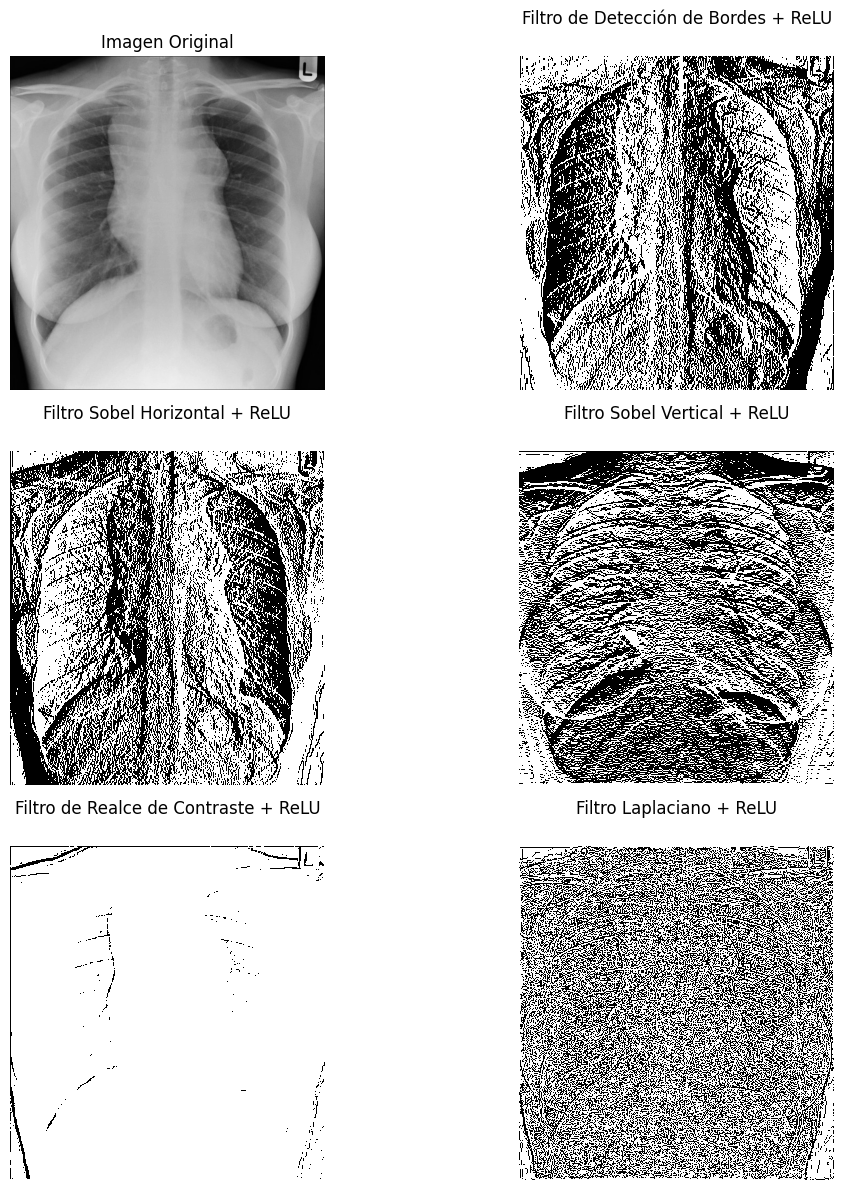

In [ ]:
def relu(matrix):
    return np.maximum(0, matrix)
def show_imagen_invertido(matrix, title, subplot_pos):
    ax = plt.subplot(3, 2, subplot_pos)
    ax.matshow(matrix, cmap='gray_r', vmin=0, vmax=1)
    plt.title(title)
    plt.axis('off')
def show_image(img, title, subplot_pos):
    plt.subplot(3, 2, subplot_pos)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')



# Carga una imagen usando OpenCV
image_path = '/content/imagen 1.jpeg'  # Reemplaza con el path de tu imagen
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Asegúrate de que la imagen sea en escala de grises

# Define varios kernels diferentes y sus nombres
kernels = [
    (np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]), "Filtro de Detección de Bordes"),
    (np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]), "Filtro Sobel Horizontal"),
    (np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]), "Filtro Sobel Vertical"),
    (np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]), "Filtro de Realce de Contraste"),
    (np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]), "Filtro Laplaciano")
]

# Muestra los resultados usando subplots
plt.figure(figsize=(12, 12))
show_image(image, 'Imagen Original', 1)

# Aplica cada kernel y muestra el resultado
for i, (kernel, title) in enumerate(kernels, 2):
    convolved_image = convolve2d(image, kernel, mode='valid')
    convolved_image = convolved_image * -1
    relu_umage = relu(convolved_image)
    show_imagen_invertido(relu_umage, f'{title} + ReLU', i)


plt.tight_layout()
plt.show()


##**Max-Pooling**


###**Max-Pooling en la imagen A**


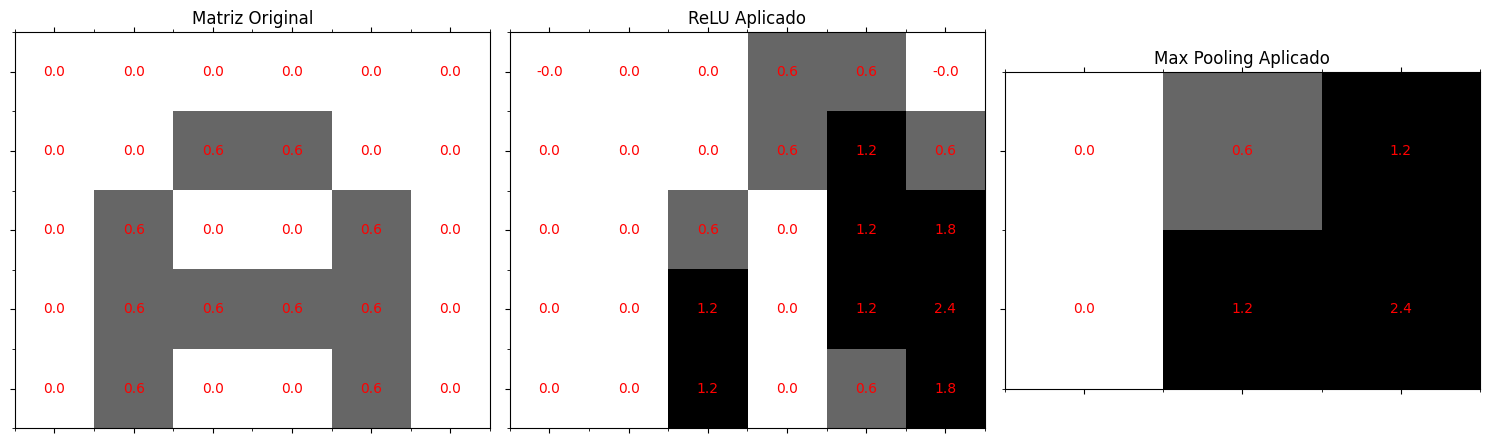

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

def show_matrix_with_numbers(matrix, title, subplot_pos, vmin, vmax):
    ax = plt.subplot(1, 3, subplot_pos)  # Ajustado para una cuadrícula 1x3
    ax.matshow(matrix, cmap='gray_r', vmin=vmin, vmax=vmax)
    # Establecer las posiciones de las marcas (ticks)
    ax.set_xticks(np.arange(-0.5, len(matrix[0]), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(matrix), 1), minor=True)

    # Eliminar las etiquetas de los ejes
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title(title)
    for (i, j), val in np.ndenumerate(matrix):
        ax.text(j, i, f'{val:.1f}', ha='center', va='center', color='red')

def relu(matrix):
    return np.maximum(0, matrix)

def max_pooling(matrix, size=2):
    # Altura y anchura de la matriz de entrada
    H, W = matrix.shape

    # Altura y anchura de la matriz de salida
    HO = H // size
    WO = W // size

    # Crear la matriz de salida
    output = np.zeros((HO, WO))

    # Aplicar el max pooling
    for i in range(HO):
        for j in range(WO):
            output[i, j] = np.max(matrix[i*size:(i+1)*size, j*size:(j+1)*size])
    return output

# Crea una matriz con la forma de la letra 'A'
matrix = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0.6, 0.6, 0, 0],
    [0, 0.6, 0, 0, 0.6, 0],
    [0, 0.6, 0.6, 0.6, 0.6, 0],
    [0, 0.6, 0, 0, 0.6, 0]
])

# Define solo el filtro de promediado
kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

# Aplica el filtro de promediado y muestra el resultado
convolved_matrix = convolve2d(matrix, kernel, mode='same')
convolved_matrix = convolved_matrix * -1

# Aplica ReLU a la matriz convolucionada
relu_matrix = relu(convolved_matrix)

# Aplica max pooling a la matriz con ReLU aplicado
maxpooled_matrix = max_pooling(relu_matrix)

# Muestra los resultados usando subplots
plt.figure(figsize=(15, 5))

# Muestra la matriz original
show_matrix_with_numbers(matrix, 'Matriz Original', 1, 0, 1)

# Muestra ReLU aplicado
show_matrix_with_numbers(relu_matrix, 'ReLU Aplicado', 2, 0, 1)

# Muestra max pooling aplicado
show_matrix_with_numbers(maxpooled_matrix, 'Max Pooling Aplicado', 3, 0, 1)

plt.tight_layout()
plt.show()


###**Max-Pooling en radiografia de torax**


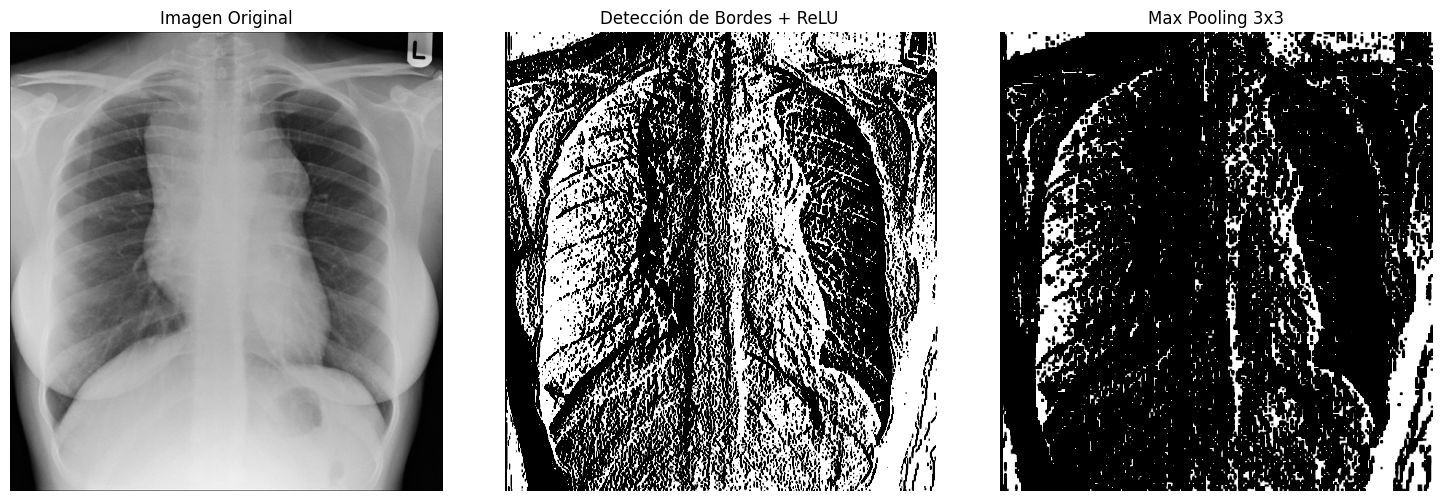

In [ ]:
def show_image_binaria_invertida(img, title, subplot_pos):
    plt.subplot(1, 3, subplot_pos)
    plt.imshow(img, cmap='gray_r', vmin=0, vmax=1)
    plt.title(title)
    plt.axis('off')

def show_image(img, title, subplot_pos):
    plt.subplot(1, 3, subplot_pos)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')

def relu(matrix):
    return np.maximum(0, matrix)

def max_pooling(matrix, size=3):
    H, W = matrix.shape
    HO = H // size
    WO = W // size
    output = np.zeros((HO, WO))
    for i in range(HO):
        for j in range(WO):
            output[i, j] = np.max(matrix[i*size:(i+1)*size, j*size:(j+1)*size])
    return output

# Carga una imagen usando OpenCV
# Nota: Reemplaza 'tu_imagen.jpg' con la ruta de tu imagen
image_path = '/content/imagen 1.jpeg'  # Reemplaza con el path de tu imagen
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define el filtro de detección de bordes
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

# Aplica el filtro de detección de bordes
convolved_matrix = convolve2d(image, kernel, mode='same')

# Aplica ReLU a la imagen convolucionada
relu_matrix = relu(convolved_matrix)

# Aplica max pooling a la imagen con ReLU aplicado
maxpooled_matrix = max_pooling(relu_matrix)

# Muestra los resultados usando subplots
plt.figure(figsize=(15, 5))

# Muestra la imagen original
show_image(image, 'Imagen Original', 1)

# Muestra ReLU aplicado
show_image_binaria_invertida(relu_matrix, 'Detección de Bordes + ReLU ', 2)

# Muestra max pooling aplicado
show_image_binaria_invertida(maxpooled_matrix, 'Max Pooling 3x3', 3)

plt.tight_layout()
plt.show()
